**IMPORTING ESSENTIAL MODULES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

import os
os.getcwd()

'C:\\Users\\user'

**LOADING THE DATASET**

In [2]:
url = 'https://raw.githubusercontent.com/vkoul/data/main/misc/instacart.csv'

In [3]:
data = pd.read_csv(url)

In [4]:
data.head()

,order_delivery_time,order_id,customer_order_rating,type_of_issue _reported,region
0,2014-06-02 04:23:16 UTC,233599337,5,NaN,chi
1,2014-06-02 03:57:50 UTC,233599376,5,NaN,chi
2,2014-06-02 02:52:38 UTC,233599328,5,NaN,chi
3,2014-06-02 02:52:04 UTC,233599070,5,NaN,chi
4,2014-06-02 02:41:43 UTC,233599100,5,NaN,chi


***DATA CHECK***

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14957 entries, 0 to 14956
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   order_delivery_time      14957 non-null  object
 1   order_id                 14957 non-null  int64 
 2   customer_order_rating    14957 non-null  int64 
 3   type_of_issue _reported  1087 non-null   object
 4   region                   14957 non-null  object
dtypes: int64(2), object(3)
memory usage: 584.4+ KB


In [6]:
data.isnull().sum()

order_delivery_time            0
order_id                       0
customer_order_rating          0
type_of_issue _reported    13870
region                         0
dtype: int64

In [7]:
data.columns =  ['order_delivery_time', 'order_id', 'customer_order_rating',
       'type_of_issue_reported', 'region']

In [8]:
data.columns

Index(['order_delivery_time', 'order_id', 'customer_order_rating',
       'type_of_issue_reported', 'region'],
      dtype='object')

In [9]:
data.duplicated().sum()

123

In [10]:
data.drop_duplicates(inplace = True)

In [11]:
data.duplicated().sum()

0

***IMPORTING THE DATA CORRECTLY***

The column 'order_delivery_time' has been wrongly classified as an object

In [12]:
df1 = pd.read_csv(url,
                 parse_dates = ['order_delivery_time'],
                 date_parser = lambda col: pd.to_datetime(col, utc = True))

***DATA CLEANING***

In [13]:
df1['customer_order_rating'].unique()

array([5, 4, 3, 2, 1, 0], dtype=int64)

In [14]:
df1['type_of_issue _reported'].unique()

array([nan, 'Wrong item', 'Item charged incorrectly',
       'Damaged or spoiled', 'Item missing', 'Other Order Issue',
       'Poor service', 'Poor replacement'], dtype=object)

In [15]:
df1['region'].unique()

array(['chi', 'nyc', 'sf', 'sf '], dtype=object)

***In the above list, you can see that there are two enteries for sf. Its because there is a whitespace in the data, we therefore need to remove it***

In [16]:
df1['region'] = df1['region'].str.strip()

In [17]:
df1['region'].unique()

array(['chi', 'nyc', 'sf'], dtype=object)

****VISUALIZING THE DELIVERY TIME ACROSS THE DIFFERENT REGIONS****

In [18]:
df1['hour'] = df1['order_delivery_time'].dt.hour

In [19]:
df1.head().style.set_properties(**{'background-color' : 'purple',
                                  'color': 'white',
                                  'border-color': 'white'},
                                   )

,order_delivery_time,order_id,customer_order_rating,type_of_issue _reported,region,hour
0,2014-06-02 04:23:16+00:00,233599337,5,nan,chi,4
1,2014-06-02 03:57:50+00:00,233599376,5,nan,chi,3
2,2014-06-02 02:52:38+00:00,233599328,5,nan,chi,2
3,2014-06-02 02:52:04+00:00,233599070,5,nan,chi,2
4,2014-06-02 02:41:43+00:00,233599100,5,nan,chi,2


***UNIVARIATE ANALYSIS FOR SF***

In [20]:
sf = df1[df1['region'] == "sf"]
sf

,order_delivery_time,order_id,customer_order_rating,type_of_issue _reported,region,hour
7720,2014-06-02 06:16:19+00:00,233599504,5,NaN,sf,6
7721,2014-06-02 05:58:10+00:00,233599318,5,NaN,sf,5
7722,2014-06-02 05:47:00+00:00,233599434,5,NaN,sf,5
7723,2014-06-02 05:42:17+00:00,233599167,5,NaN,sf,5
7724,2014-06-02 05:40:08+00:00,233599356,5,NaN,sf,5
...,...,...,...,...,...,...
14952,2014-05-07 20:29:32+00:00,233614661,0,NaN,sf,20
14953,2014-05-05 23:59:17+00:00,233614666,0,NaN,sf,23
14954,2014-05-04 22:48:29+00:00,233614671,0,NaN,sf,22
14955,2014-05-03 17:41:36+00:00,233614676,0,NaN,sf,17


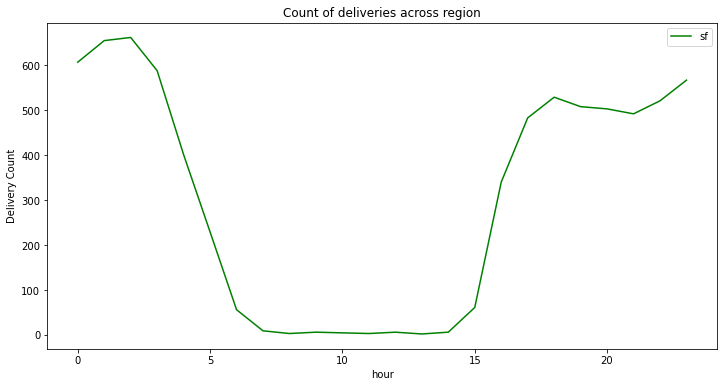

In [21]:
plt.figure(figsize = (12, 6))

sf.groupby('hour')['order_id'].count().plot(kind = 'line', label = "sf", color = 'green')
plt.title("Count of deliveries across region")
plt.xlabel('hour')
plt.ylabel('Delivery Count')

plt.legend()

plt.show();

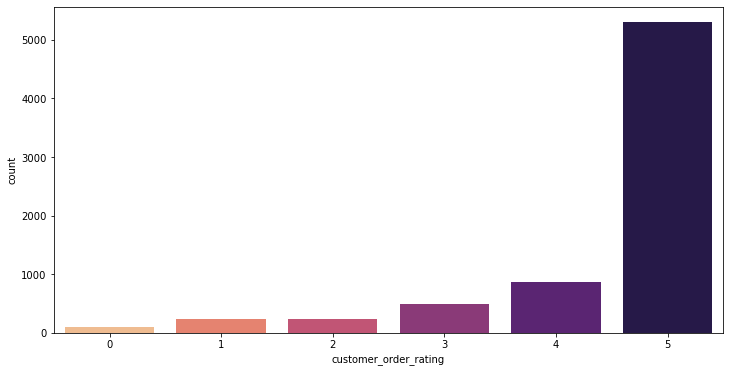

In [22]:
plt.figure(figsize = (12,6))
sns.countplot(data=df1,x=sf['customer_order_rating'] ,palette="magma_r")
plt.show()

***CHICAGO***

In [25]:
chi = df1[df1['region'] == "chi"]
#chi

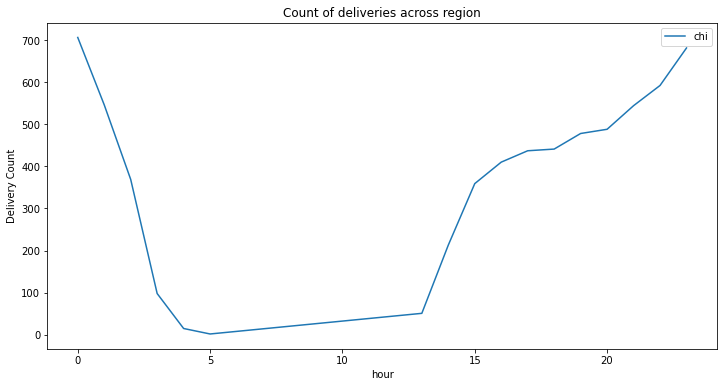

In [26]:
plt.figure(figsize = (12, 6))

chi.groupby('hour')['order_id'].count().plot(kind = 'line', label = "chi")
plt.title("Count of deliveries across region")
plt.xlabel('hour')
plt.ylabel('Delivery Count')
plt.legend()
plt.show();


In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(data=df1,x=chi['customer_order_rating'] ,palette="magma_r")
plt.show()

***NEW YORK***

In [28]:
nyc = df1[df1['region'] == "nyc"]
#nyc

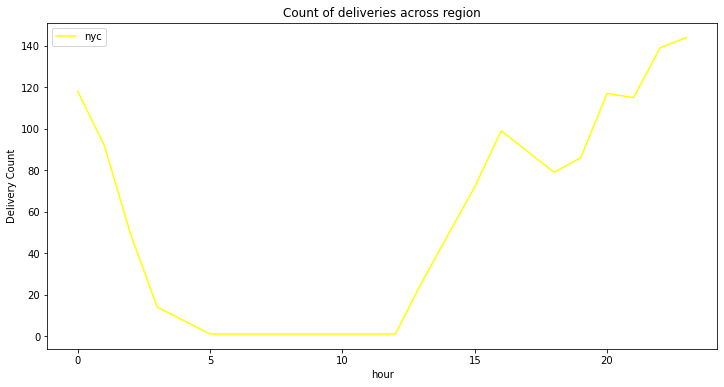

In [29]:
plt.figure(figsize = (12, 6))

nyc.groupby('hour')['order_id'].count().plot(kind = 'line', label = "nyc", color = 'yellow')
plt.title("Count of deliveries across region")
plt.xlabel('hour')
plt.ylabel('Delivery Count')
plt.legend()
plt.show();


In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(data=df1,x=nyc['customer_order_rating'] ,palette="magma_r")
plt.show()

***ALL REGIONS***

In [ ]:
all_region = df1['region'].unique().tolist()
all_region

In [ ]:
plt.figure(figsize = (12, 6))

for region in all_region:
    (df1[df1['region'] == region]
    .groupby('hour')['order_id']
    .count()
     .plot(kind ='line', title = 'All regions in one chart')
          )

In [ ]:
# plt.figure(figsize= (12,6))
# for region in all_region:
#     (df1[df1['region'] == region]
#      .groupby('hour')['order_id']
#      .count()
#      .plot(kind = 'line', title = region)
#     );
#     plt.figure();

***We notice that there is an odd trend in the order delivery times; this is because the UTC does not apply to all regions. We need to change the timezones to get more accurate readings***

In [30]:
sf['local_time'] = sf['order_delivery_time'].dt.tz_convert('US/Pacific')
sf['local_hour'] = sf['local_time'].dt.hour


In [31]:
sf.head()

,order_delivery_time,order_id,customer_order_rating,type_of_issue _reported,region,hour,local_time,local_hour
7720,2014-06-02 06:16:19+00:00,233599504,5,NaN,sf,6,2014-06-01 23:16:19-07:00,23
7721,2014-06-02 05:58:10+00:00,233599318,5,NaN,sf,5,2014-06-01 22:58:10-07:00,22
7722,2014-06-02 05:47:00+00:00,233599434,5,NaN,sf,5,2014-06-01 22:47:00-07:00,22
7723,2014-06-02 05:42:17+00:00,233599167,5,NaN,sf,5,2014-06-01 22:42:17-07:00,22
7724,2014-06-02 05:40:08+00:00,233599356,5,NaN,sf,5,2014-06-01 22:40:08-07:00,22


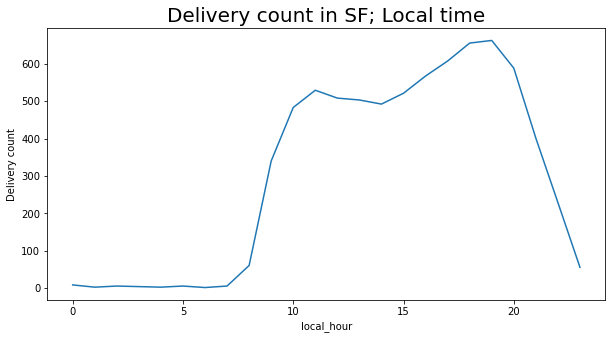

In [57]:
plt.figure(figsize = (10,5))
sf.groupby('local_hour')['order_id'].count().plot(kind = 'line')
plt.title('Delivery count in SF; Local time', fontsize = 20)
plt.ylabel('Delivery count')
plt.show();

**CHICAGO**

In [41]:
chi['local_time'] = chi['order_delivery_time'].dt.tz_convert('US/Central')
chi['local_hour'] = chi['local_time'].dt.hour
chi.head().style.set_properties(**{'background-color' : 'blue',
                                  'color' : 'white',
                                  'border-color' : 'white'},
                               )


,order_delivery_time,order_id,customer_order_rating,type_of_issue _reported,region,hour,local_time,local_hour
0,2014-06-02 04:23:16+00:00,233599337,5,nan,chi,4,2014-06-01 23:23:16-05:00,23
1,2014-06-02 03:57:50+00:00,233599376,5,nan,chi,3,2014-06-01 22:57:50-05:00,22
2,2014-06-02 02:52:38+00:00,233599328,5,nan,chi,2,2014-06-01 21:52:38-05:00,21
3,2014-06-02 02:52:04+00:00,233599070,5,nan,chi,2,2014-06-01 21:52:04-05:00,21
4,2014-06-02 02:41:43+00:00,233599100,5,nan,chi,2,2014-06-01 21:41:43-05:00,21


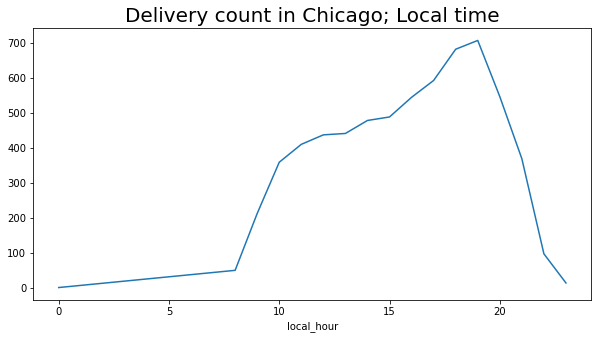

In [54]:
plt.figure(figsize = (10, 5))
chi.groupby('local_hour')['order_id'].count().plot(kind = 'line')
plt.title('Delivery count in Chicago; Local time', fontsize = 20)
plt.show()

**NYC**

In [47]:
nyc['local_time'] = nyc['order_delivery_time'].dt.tz_convert('US/Eastern')
nyc['local_hour'] = nyc['local_time'].dt.hour
nyc.head().style.set_properties(**{'background-color' : 'orange',
                                  'color' : 'white',
                                  'border-color' : 'white'},
                               )


,order_delivery_time,order_id,customer_order_rating,type_of_issue _reported,region,hour,local_time,local_hour
6430,2014-06-02 02:33:02+00:00,233599247,5,nan,nyc,2,2014-06-01 22:33:02-04:00,22
6431,2014-06-02 01:31:11+00:00,233598545,5,nan,nyc,1,2014-06-01 21:31:11-04:00,21
6432,2014-06-02 01:20:37+00:00,233598831,5,nan,nyc,1,2014-06-01 21:20:37-04:00,21
6433,2014-06-01 23:31:22+00:00,233598712,5,nan,nyc,23,2014-06-01 19:31:22-04:00,19
6434,2014-06-01 23:25:49+00:00,233598480,5,nan,nyc,23,2014-06-01 19:25:49-04:00,19


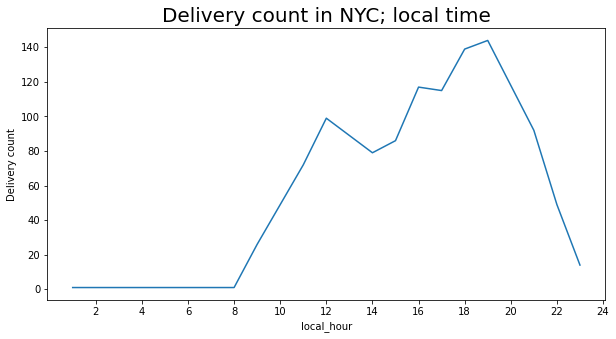

In [56]:
plt.figure(figsize = (10, 5))
nyc.groupby('local_hour')['order_id'].count().plot(kind = 'line')
plt.title('Delivery count in NYC; local time', fontsize = 20)
plt.ylabel('Delivery count')
plt.xticks([2,4,6,8,10,12,14,16,18,20,22,24])
plt.show();